In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeRegressor 
from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV



In [2]:
df = pd.read_csv('CarSeats_Dataset.csv')
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
urban_dummies = pd.get_dummies(df.Urban,prefix = 'Urban')
us_dummies = pd.get_dummies(df.US,prefix='US')
shelveloc_dummies = pd.get_dummies(df.ShelveLoc,prefix='shelveloc')
df_dummied = pd.concat([df,urban_dummies,us_dummies,shelveloc_dummies],axis=1)
df_dummied

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Urban_No,Urban_Yes,US_No,US_Yes,shelveloc_Bad,shelveloc_Good,shelveloc_Medium
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,0,1,0,1,1,0,0
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,0,1,0,1,0,1,0
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,0,1,0,1,0,0,1
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,0,1,0,1,0,0,1
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,0,1,0,1,0,1,0
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,1,0,0,1,0,0,1
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,0,1,0,1,0,0,1
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,0,1,0,1,1,0,0


Dummy Variable Trap is prevented

In [4]:
df = df_dummied.drop(['Urban_No','US_No','Urban','US','ShelveLoc','shelveloc_Medium'],axis=1)
df

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban_Yes,US_Yes,shelveloc_Bad,shelveloc_Good
0,9.50,138,73,11,276,120,42,17,1,1,1,0
1,11.22,111,48,16,260,83,65,10,1,1,0,1
2,10.06,113,35,10,269,80,59,12,1,1,0,0
3,7.40,117,100,4,466,97,55,14,1,1,0,0
4,4.15,141,64,3,340,128,38,13,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,1,1,0,1
396,6.14,139,23,3,37,120,55,11,0,1,0,0
397,7.41,162,26,12,368,159,40,18,1,1,0,0
398,5.94,100,79,7,284,95,50,12,1,1,1,0


In [5]:
y = df['Sales']
X = df.drop('Sales',axis=1)


In [6]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
Xscaled = scaler.fit_transform(X)

In [7]:
X_train, X_test , y_train, y_test = train_test_split(Xscaled, y, test_size=0.2, random_state=5)

# Default Initial Decision Tree Test

In [8]:
# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)  
# fit the regressor
regressor.fit(X_train, y_train) 

DecisionTreeRegressor(random_state=0)

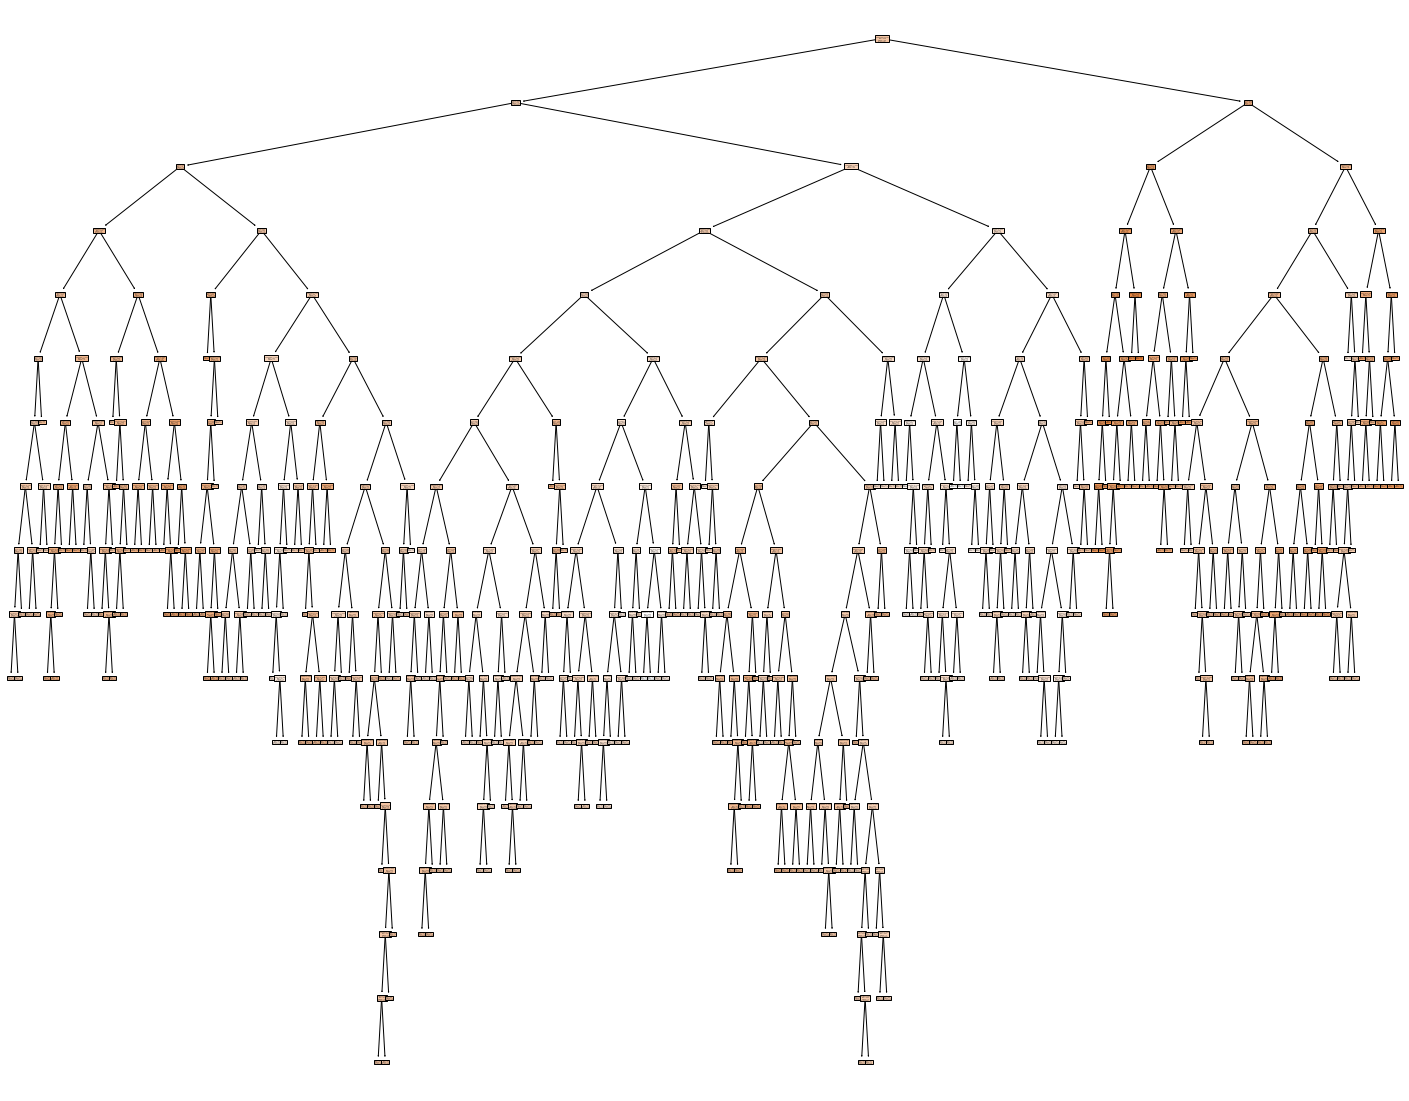

In [173]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regressor, feature_names=X.columns, filled=True)

In [9]:
regressor.tree_.node_count

633

In [11]:
results=pd.DataFrame({'Actual Values':y_test, 'Predicted Values':y_pred})
results

,Actual Values,Predicted Values
218,9.70,8.65
191,6.67,9.16
117,8.80,8.74
50,1.42,4.96
348,12.57,14.90
...,...,...
184,9.95,8.69
140,6.03,6.93
107,8.55,6.11
241,12.01,10.48


In [12]:
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

Mean Squared Error: 5.425706249999999


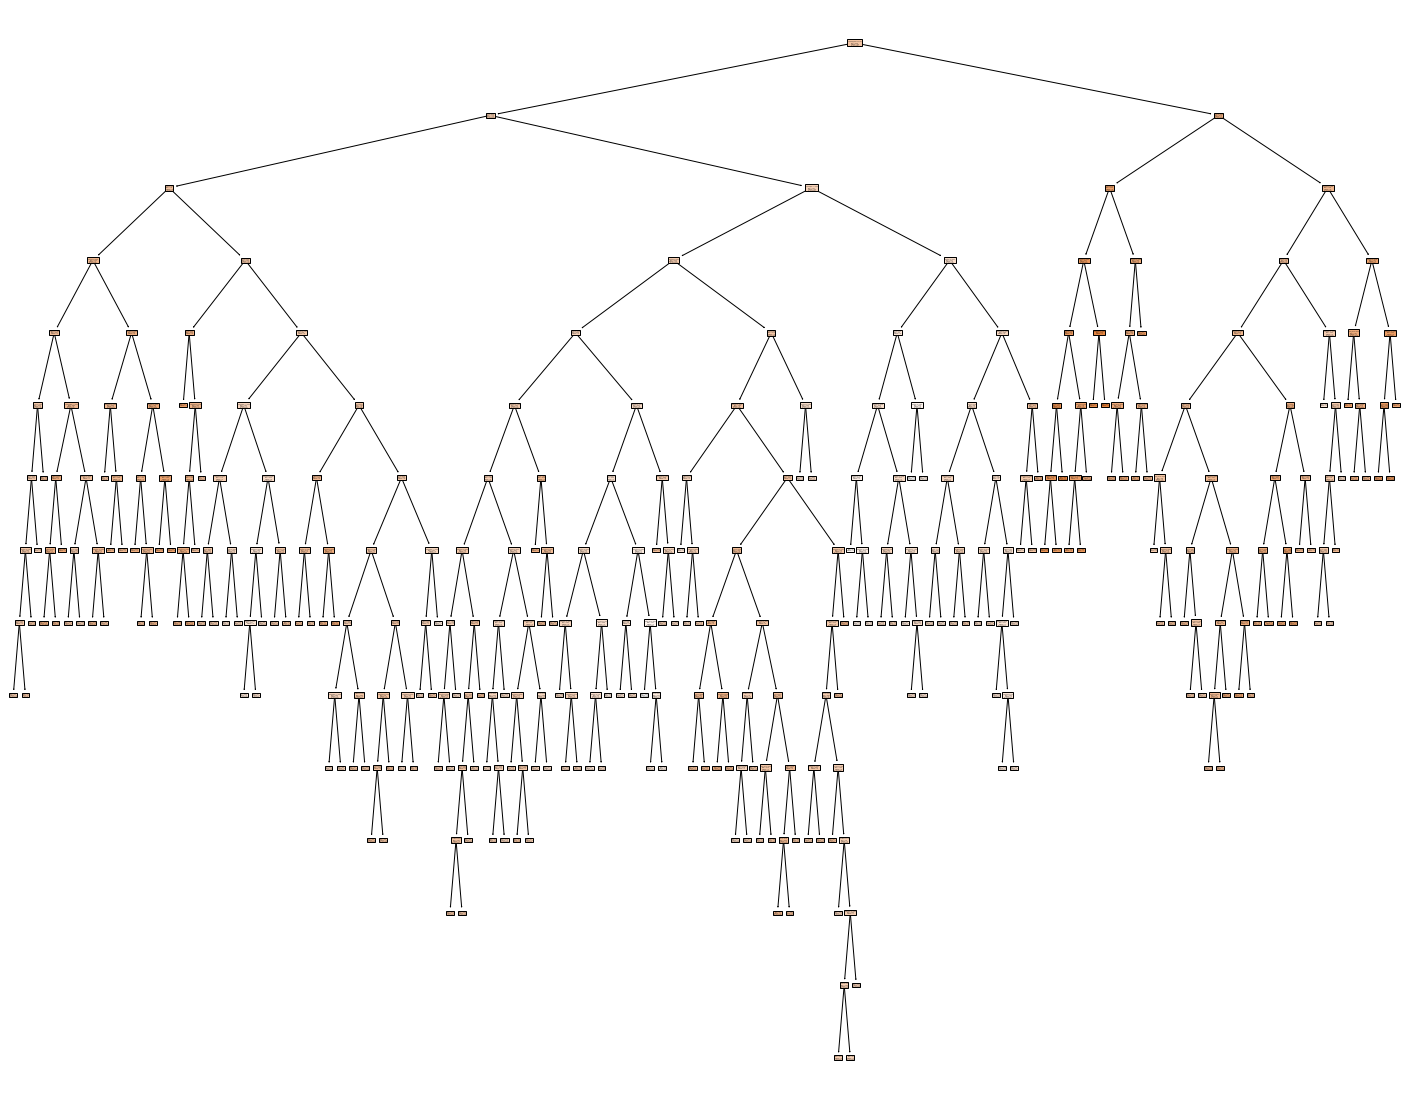

In [14]:
regressor = DecisionTreeRegressor(random_state = 0, ccp_alpha=0.001)  
regressor.fit(X_train, y_train) 
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regressor, feature_names=X.columns, filled=True)
y_pred = regressor.predict(X_test)

In [15]:
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

Mean Squared Error: 5.243107979513889


# Interpretation for Default Decision Tree and Little Regularized Tree

I get these results without any regularization etc. Just by using the default parameters I got 5.73 mean square error. Besides my decision tree is very deep with many branches. Then, I just pick random alpha value for regularization which leads to better mse scores succeding by smaller tree

# Cross Validation and Picking best alpha value

In [16]:
cv = KFold(n_splits=10, random_state=10, shuffle=True)

CV_results = []

alpha_values = np.linspace(0,1,num=2000)

for i in alpha_values:
    for train_index, validation_index in cv.split(X_train):
        X_trainp, X_valid = X_train[train_index], X_train[validation_index]
        y_trainp, y_valid = y_train.iloc[train_index], y_train.iloc[validation_index]
        
        
        
        regressor = DecisionTreeRegressor(random_state = 0, ccp_alpha=i)
        regressor.fit(X_trainp, y_trainp) 
        y_pred=regressor.predict(X_valid)
        
        
        train_score = mean_squared_error(y_trainp, regressor.predict(X_trainp))
        validation_score = mean_squared_error(y_valid, y_pred)
        
        CV_results.append([i,train_score,validation_score])
        
        
df = pd.DataFrame(CV_results,columns=['alpha','Training Error(mse)','Validation Error(mse)'])


In [17]:
cv_scores_by_alpha = df.groupby('alpha').mean().reset_index()
cv_scores_by_alpha.sort_values('Validation Error(mse)')


,alpha,Training Error(mse),Validation Error(mse)
59,0.029515,0.947708,4.398912
57,0.028514,0.921552,4.404077
56,0.028014,0.904588,4.406209
58,0.029015,0.933029,4.409092
55,0.027514,0.893468,4.423936
...,...,...,...
1811,0.905953,5.797195,6.274893
1809,0.904952,5.797195,6.274893
1808,0.904452,5.797195,6.274893
1820,0.910455,5.797195,6.274893


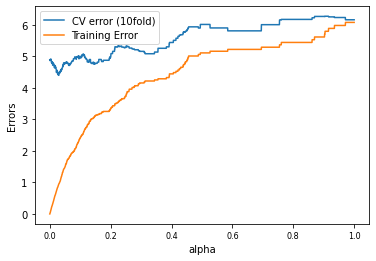

In [18]:
fig=plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(cv_scores_by_alpha['alpha'].values,cv_scores_by_alpha['Validation Error(mse)'].values,label = 'CV error (10fold)')
ax.plot(cv_scores_by_alpha['alpha'].values,cv_scores_by_alpha['Training Error(mse)'].values,label = 'Training Error')
ax.set_xlabel('alpha')
ax.set_ylabel('Errors')
ax.tick_params(axis='x', labelsize=8)
ax.legend(loc='best')

Mean Squared Error: 5.070732622090264


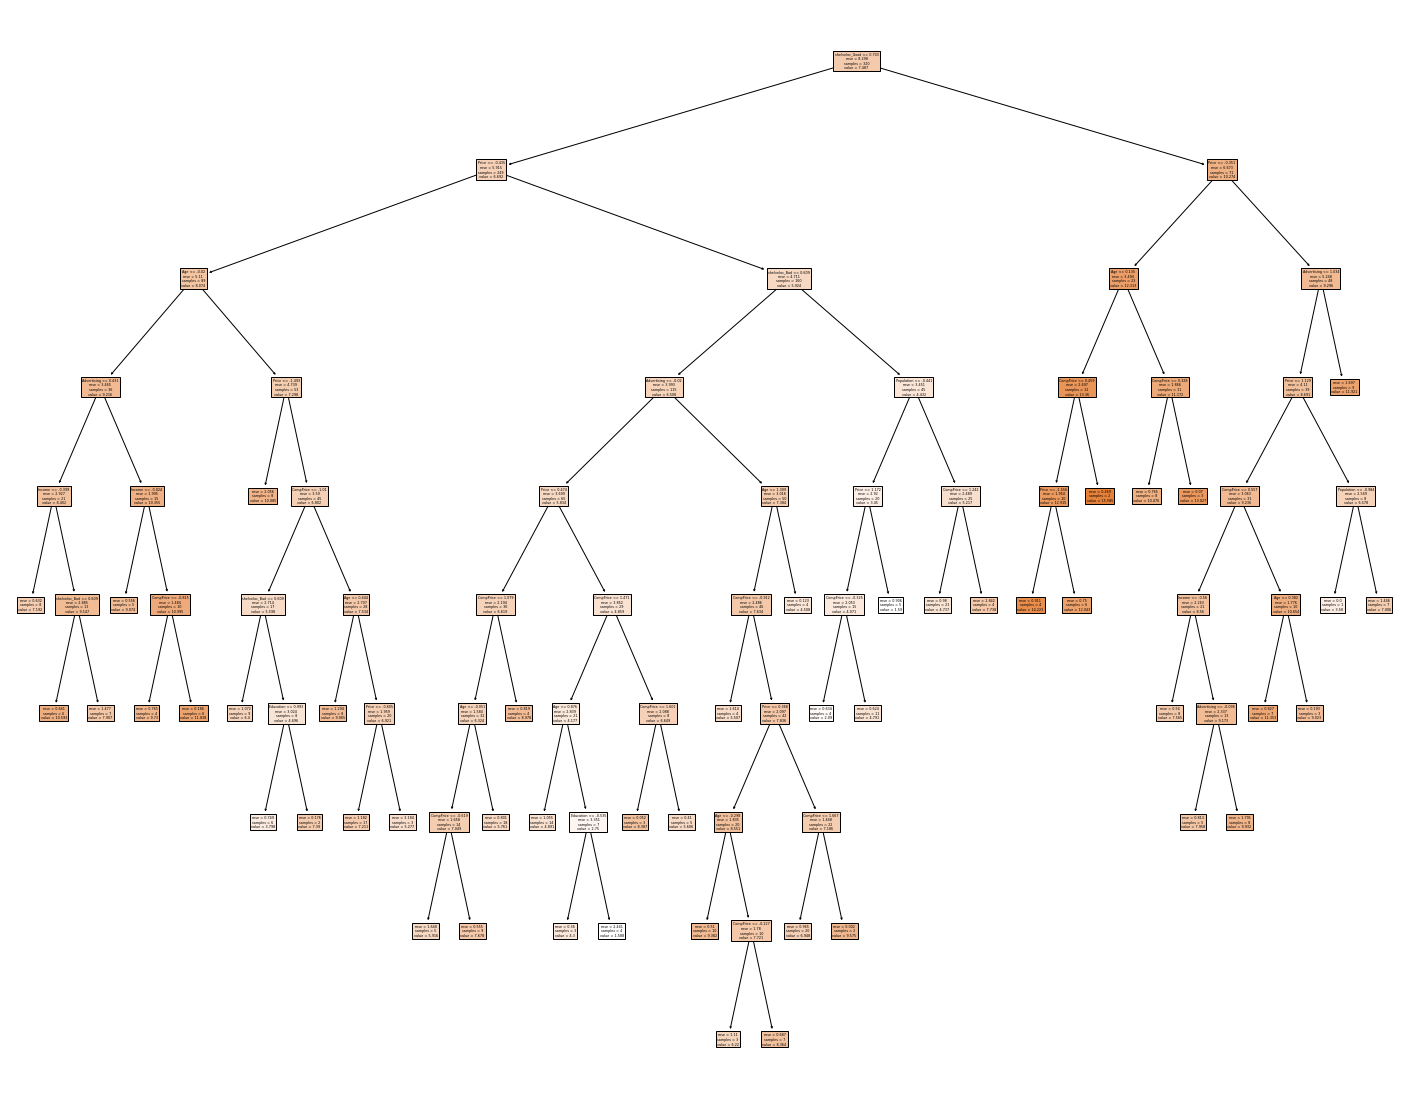

In [19]:
regressor = DecisionTreeRegressor(random_state = 0, ccp_alpha=0.029515)  
regressor.fit(X_train, y_train) 
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regressor, feature_names=X.columns, filled=True)
y_pred = regressor.predict(X_test)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

# Pruning

In [20]:
path_to_prune = regressor.cost_complexity_pruning_path(X_train, y_train)
path_to_prune

{'ccp_alphas': array([0.00000000e+00, 1.56250000e-07, 1.56250000e-07, 1.56250000e-07,
        1.56250000e-07, 1.56250000e-07, 1.56250000e-07, 6.25000000e-07,
        6.25000000e-07, 6.25000000e-07, 1.40625000e-06, 1.40625000e-06,
        1.40625000e-06, 1.40625000e-06, 1.40625000e-06, 2.50000000e-06,
        2.50000000e-06, 3.90625000e-06, 3.90625000e-06, 3.90625000e-06,
        3.90625000e-06, 3.90625000e-06, 5.62500000e-06, 5.62500000e-06,
        5.62500000e-06, 6.30208333e-06, 7.65625000e-06, 7.65625000e-06,
        1.00000000e-05, 1.00000000e-05, 1.00000000e-05, 1.26562500e-05,
        1.26562500e-05, 1.26562500e-05, 1.26562500e-05, 1.33333333e-05,
        1.33333333e-05, 1.50520833e-05, 1.56250000e-05, 2.08333333e-05,
        2.25000000e-05, 2.25000000e-05, 2.25000000e-05, 2.25000000e-05,
        2.64062500e-05, 2.64062500e-05, 3.06250000e-05, 3.06250000e-05,
        3.06250000e-05, 3.06250000e-05, 3.06250000e-05, 3.19010417e-05,
        3.51562500e-05, 4.00000000e-05, 4.00000000

In [21]:
cv = KFold(n_splits=10, random_state=10, shuffle=True)

CV_results = []

alpha_values = np.linspace(0,1,num=2000)

for i in path_to_prune.ccp_alphas:
    for train_index, validation_index in cv.split(X_train):
        X_trainp, X_valid = X_train[train_index], X_train[validation_index]
        y_trainp, y_valid = y_train.iloc[train_index], y_train.iloc[validation_index]
        
        
        
        regressor = DecisionTreeRegressor(random_state = 0, ccp_alpha=i)
        regressor.fit(X_trainp, y_trainp) 
        y_pred=regressor.predict(X_valid)
        
        
        train_score = mean_squared_error(y_trainp, regressor.predict(X_trainp))
        validation_score = mean_squared_error(y_valid, y_pred)
        
        CV_results.append([i,train_score,validation_score])
        
        
df = pd.DataFrame(CV_results,columns=['alpha','Training Error(mse)','Validation Error(mse)'])


In [22]:
cv_scores_by_alpha = df.groupby('alpha').mean().reset_index()
cv_scores_by_alpha.sort_values('Validation Error(mse)')


,alpha,Training Error(mse),Validation Error(mse)
257,0.029822,0.950683,4.404034
255,0.028406,0.921552,4.404077
256,0.028407,0.921552,4.404077
254,0.025259,0.829904,4.474459
261,0.033338,1.026190,4.479713
...,...,...,...
294,0.228718,3.586877,5.311874
297,0.435555,4.655218,5.689636
298,0.442361,4.742890,5.782685
299,0.826029,5.443386,6.174722


Mean Squared Error: 4.783568842327673


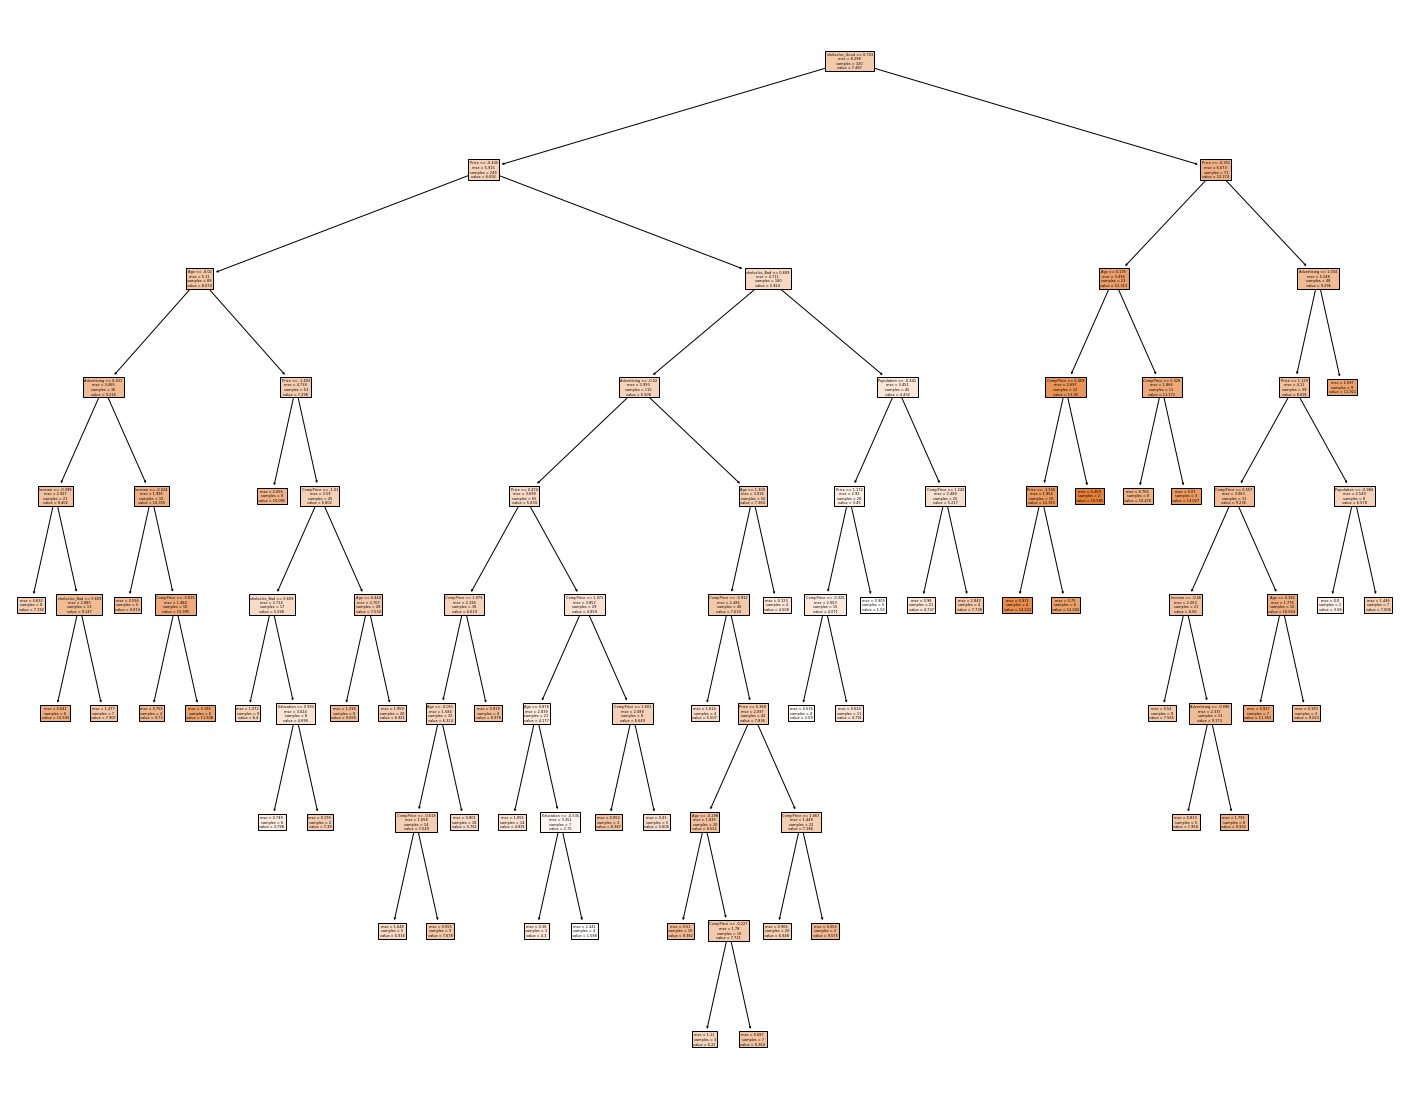

In [23]:
regressor = DecisionTreeRegressor(random_state = 0, ccp_alpha=0.029822)  
regressor.fit(X_train, y_train) 
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regressor, feature_names=X.columns, filled=True)
y_pred = regressor.predict(X_test)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

In [24]:
regressor.tree_.node_count

91

# Interpretation About Pruning and Alpha Value

When we tested different alpha values in our given range, results were very interesting. For alpha 0, it gave 0 mse for trainig set. When I have checked node count I saw for alpha = 0, tree has 633 nodes which indicates overfitting, as its value on cv is much. Then when O I have done cross validation on given range, I get alpha = 0.029515 gives me the best result. Then later, when I have done pruninig, ideal alpha value was 0.029822 which was very close to the previous one. However, I think it has made quite good improvement both in cross-validation score and test score. As you can see at outputs above.

# Random Forrest

In [25]:
X_train, X_test , y_train, y_test = train_test_split(Xscaled, y, test_size=0.2, random_state=1)

In [26]:
#Fit random forests
reg=RandomForestRegressor(random_state=0,n_estimators=100,oob_score=True)
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)


In [27]:
results=pd.DataFrame({'Actual Values':y_test, 'Predicted Values':y_pred})
results

,Actual Values,Predicted Values
398,5.94,6.3048
125,9.34,9.3742
328,3.15,4.5249
339,11.54,10.2927
172,9.03,11.0226
...,...,...
347,6.88,9.4154
41,7.96,6.2700
180,4.94,4.8115
132,9.54,7.5130


oob_score :  out-of-bag samples to estimate the R^2 

In [28]:
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print("oob score : ",reg.oob_score_)

Mean Squared Error: 3.1127826526250004
oob score :  0.6788277428508589


# n_estimators and max_features Random Forrest

In [29]:
#Let's try different numbers of trees
oob_scores=[]
for i in np.linspace(start = 50, stop = 500, num = 10):
    reg=RandomForestRegressor(random_state=0,n_estimators=int(i),oob_score=True)
    reg.fit(X_train,y_train)
    y_pred=reg.predict(X_test)
    oob_scores.append([int(i),np.array(reg.oob_score_)])
df = pd.DataFrame(oob_scores,columns=['n_estimators','Oob Score'])
df

,n_estimators,Oob Score
0,50,0.6653374264915934
1,100,0.6788277428508589
2,150,0.6833129225592401
3,200,0.6931640840989071
4,250,0.6912853541588468
5,300,0.6961183482664097
6,350,0.6959077595430571
7,400,0.6953710566444296
8,450,0.6982613451023426
9,500,0.699090861202598


In [30]:
#Fit random forests
reg=RandomForestRegressor(random_state=0,n_estimators=500,oob_score=True)
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print("oob score : ",reg.oob_score_)

Mean Squared Error: 3.145753848645008
oob score :  0.699090861202598


mse and oob score is not improved on test-dataset which is arised from randomness

In [31]:
#Let's try different numbers of trees
oob_scores=[]
for i in range(1,12):
    reg=RandomForestRegressor(random_state=0,n_estimators=500,max_features=i,oob_score=True)
    reg.fit(X_train,y_train)
    y_pred=reg.predict(X_test)
    oob_scores.append([int(i),np.array(reg.oob_score_)])
df = pd.DataFrame(oob_scores,columns=['max_features','Oob Score'])
df

,max_features,Oob Score
0,1,0.5461904511216055
1,2,0.6183617777701127
2,3,0.6663184441049572
3,4,0.6755680286049855
4,5,0.6887902181976604
5,6,0.6917724418947272
6,7,0.7002943982377481
7,8,0.6994840881678206
8,9,0.7036092825205055
9,10,0.6986992931325309


# Grid Search to bundle them

In [32]:
reg=RandomForestRegressor(random_state=0)
# number of trees in random forest
n_estimators = [100,200,300,400,500,600]
# number of features at every split
max_features = [i for i in range(1,12)]
# create grid
params = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 }
params

{'n_estimators': [100, 200, 300, 400, 500, 600],
 'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]}

In [33]:
# Grid search of parameters
reg_grid = GridSearchCV(estimator = reg, param_grid = params, 
                                cv = 5, verbose=2, scoring='neg_mean_squared_error',n_jobs = -1)
# Fit the model
reg_grid.fit(X_train, y_train)
# print results
print(reg_grid.best_params_)

Fitting 5 folds for each of 66 candidates, totalling 330 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done 330 out of 330 | elapsed:   52.2s finished


{'max_features': 8, 'n_estimators': 200}


In [34]:
#Fit random forests
reg=RandomForestRegressor(random_state=0,n_estimators=200,max_features=8,oob_score=True)
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print("oob score : ",reg.oob_score_)

Mean Squared Error: 3.0829119023124956
oob score :  0.6936540431657945


# Also Test Set Selected on Cross Validation to eliminate randomness

In [35]:
reg=RandomForestRegressor(random_state=0)

from sklearn.model_selection import KFold
cv = KFold(n_splits=5, random_state=1, shuffle=True)
CVErrors=[]
for train_index, test_index in cv.split(Xscaled):
    X_train, X_test = Xscaled[train_index], Xscaled[test_index], 
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # Grid search of parameters
    reg_grid = GridSearchCV(estimator = reg, param_grid = params, 
                                cv = 5, verbose=1, scoring='neg_mean_squared_error',n_jobs = -1)
    # Fit the model
    reg_grid.fit(X_train, y_train)
    # print results
    print(reg_grid.best_params_)
    #After finding best parameters fit the model
    clf=RandomForestRegressor(**reg_grid.best_params_)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    #Test the mean square error on the test set
    CVErrors.append(mean_squared_error(y_test, y_pred))

Fitting 5 folds for each of 66 candidates, totalling 330 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done 330 out of 330 | elapsed:   47.9s finished


{'max_features': 9, 'n_estimators': 100}
Fitting 5 folds for each of 66 candidates, totalling 330 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   24.7s
[Parallel(n_jobs=-1)]: Done 330 out of 330 | elapsed:   48.2s finished


{'max_features': 10, 'n_estimators': 600}
Fitting 5 folds for each of 66 candidates, totalling 330 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done 330 out of 330 | elapsed:   49.1s finished


{'max_features': 6, 'n_estimators': 600}
Fitting 5 folds for each of 66 candidates, totalling 330 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   26.6s
[Parallel(n_jobs=-1)]: Done 330 out of 330 | elapsed:   51.8s finished


{'max_features': 11, 'n_estimators': 100}
Fitting 5 folds for each of 66 candidates, totalling 330 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   25.3s
[Parallel(n_jobs=-1)]: Done 330 out of 330 | elapsed:   49.0s finished


{'max_features': 7, 'n_estimators': 200}


In [36]:
CVErrors # [2] element is smallest, also there is randomness involved. At previous cv scores, 10 features and 600 estimators
#seems quite reasonable

[3.1312208446249996,
 1.8474783633159775,
 2.1127745742430646,
 1.9505521063750009,
 3.593177516312499]

max_features 10 and estimators 600 is selected

In [37]:
X_train, X_test , y_train, y_test = train_test_split(Xscaled, y, test_size=0.2, random_state=1)

In [38]:
#Fit random forests
reg=RandomForestRegressor(random_state=0,n_estimators=600,max_features=10,oob_score=True)
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print("oob score : ",reg.oob_score_)

Mean Squared Error: 3.142421993500008
oob score :  0.702920414462473


# Importences of variables

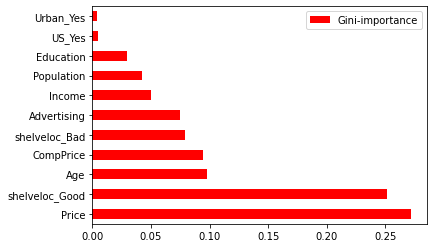

In [39]:
feats = {} # a dict to hold feature_name: feature_importance
importances = reg.feature_importances_
for feature, importance in zip(X.columns, importances):
    feats[feature] = importance #add the name/value pair 
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances = importances.sort_values(by='Gini-importance',ascending=False)
importances.plot.barh(color='r')

In [40]:
reg.feature_importances_

array([0.09440636, 0.05015531, 0.07463448, 0.04196173, 0.27198845,
       0.09773503, 0.02975953, 0.00435505, 0.00467141, 0.07916738,
       0.25116527])

# Interpretation on Random Forrest

I have max_features and num_estimators set seperately and together on cross validation for training set. Beside, I have done gridsearch with train-validation-test set cross. Which firstly, I determine train-test set, and do gridsearch with cv on train set. Train-Test set always changes. 

Overall, 600 estimators and 10 max_features seemed reasonable idea. This configuration lead 1.78 mse on that exact train-test cross. However, in my train_test_split test set it has given 3.14 mse and 0.7029 oob_score which is the highest oob_score.

Effect of number of variables can easily observed in where I do cross validation only by max_features. You can see that above. 7,8,9,10 max_features seems to give plausible predictions.

Above, you can see the effect of parametrs, ( feature importances). Here, Price seems most important variable. Then the dummy variable shelveloc cames. Urban dummy is one of the most trivial.